In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
cusdt=pd.read_csv('/content/customer_data_edited (2).csv')
cusdt.head(10)

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0
5,6,IA,117,415,no,no,0,226.5,85,38.51,...,12.04,223.0,90,10.04,6.9,5,1.86,1,no,24456543.0
6,7,ND,63,415,no,yes,32,218.9,124,37.21,...,18.22,260.3,120,11.71,12.9,3,3.48,1,no,29694916.0
7,8,LA,94,408,no,no,0,157.5,97,26.78,...,19.08,310.8,106,13.99,11.1,6,3.00,0,no,69020915.0
8,9,MO,138,510,no,no,0,89.1,117,15.15,...,10.78,190.5,71,8.57,9.9,4,2.67,2,no,22612071.0
9,10,TX,128,415,no,yes,43,177.8,100,30.23,...,12.52,194.2,92,8.74,11.9,1,3.21,0,no,12721031.0


In [ ]:
cusdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  object 
 5   voice_mail_plan                12892 non-null  object 
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

In [ ]:
cusdt.isnull()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cusdt.isnull().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [ ]:
cusdt.dtypes

recordID                           int64
state                             object
account_length                     int64
area_code                          int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
customer_id                      float64
dtype: object

In [ ]:
cusdt_columns=cusdt.columns
cusdt_columns

Index(['recordID', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'customer_id'],
      dtype='object')

In [ ]:
cusdt=cusdt.drop(columns=(['state', 'international_plan', 'voice_mail_plan']))

In [ ]:
cusdt.dtypes

recordID                           int64
account_length                     int64
area_code                          int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
customer_id                      float64
dtype: object

In [ ]:
cusdt.churn.head(40)

0      no
1      no
2      no
3      no
4      no
5      no
6      no
7      no
8      no
9      no
10     no
11     no
12     no
13     no
14     no
15     no
16     no
17     no
18     no
19     no
20     no
21     no
22     no
23     no
24     no
25     no
26     no
27     no
28     no
29     no
30     no
31     no
32     no
33     no
34     no
35     no
36    yes
37     no
38     no
39    yes
Name: churn, dtype: object

In [ ]:
cusdt['churn']=cusdt['churn'].replace({'no': 0, 'yes': 1})
LE=LabelEncoder()
churn=LE.fit_transform(cusdt['churn'])

In [ ]:
cusdt.churn.head(40)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    1
Name: churn, dtype: int64

<Axes: xlabel='total_day_charge', ylabel='total_night_charge'>

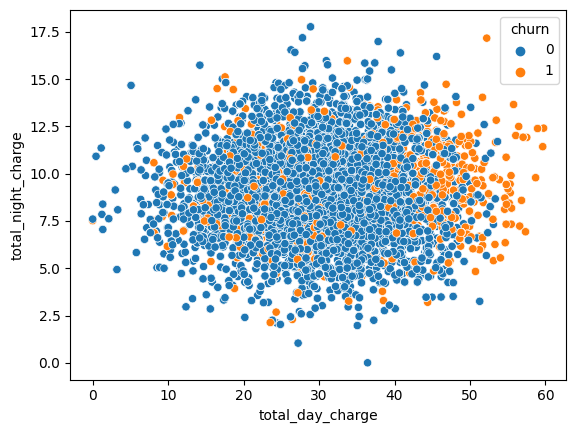

In [ ]:
sns.scatterplot(data=cusdt,x='total_day_charge', y='total_night_charge', hue='churn')

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

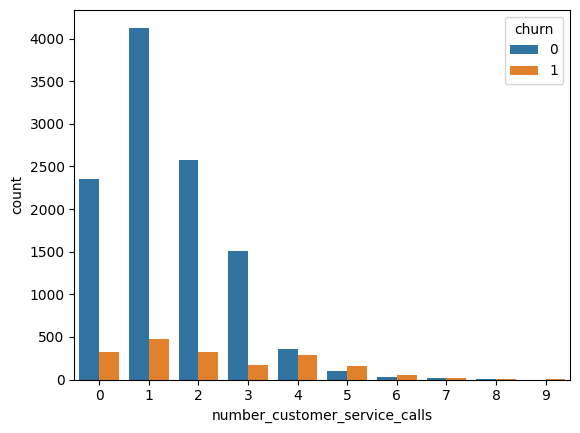

In [ ]:
sns.countplot(x='number_customer_service_calls',hue='churn',data=cusdt)

<Axes: xlabel='account_length', ylabel='Count'>

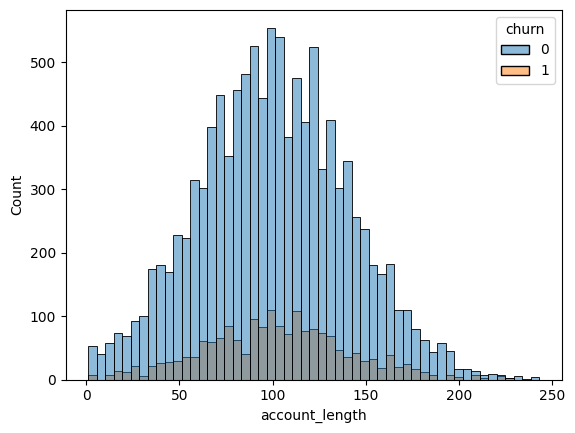

In [ ]:
sns.histplot(x='account_length',hue='churn',data=cusdt)

In [ ]:
print(cusdt['churn'].value_counts())
cls_nochurn=cusdt[cusdt['churn']==0]
cls_churn=cusdt[cusdt['churn']==1]

0    11069
1     1823
Name: churn, dtype: int64


In [ ]:
cusdt=cusdt.drop_duplicates()
cusdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12892 entries, 0 to 12891
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       12892 non-null  int64  
 1   account_length                 12892 non-null  int64  
 2   area_code                      12892 non-null  int64  
 3   number_vmail_messages          12892 non-null  int64  
 4   total_day_minutes              12892 non-null  float64
 5   total_day_calls                12892 non-null  int64  
 6   total_day_charge               12892 non-null  float64
 7   total_eve_minutes              12892 non-null  float64
 8   total_eve_calls                12892 non-null  int64  
 9   total_eve_charge               12892 non-null  float64
 10  total_night_minutes            12892 non-null  float64
 11  total_night_calls              12892 non-null  int64  
 12  total_night_charge             12892 non-null 

In [ ]:
print("Before RanndomOversampling")
print(cusdt['churn'].value_counts())
cls_nochurn=cusdt[cusdt['churn']==0]
cls_churn=cusdt[cusdt['churn']==1]

Before RanndomOversampling
0    11069
1     1823
Name: churn, dtype: int64


In [ ]:
num_dup = 11069
cusdt_majo = cusdt[cusdt['churn']==0]
cusdt_mino = cusdt[cusdt['churn']==1]
cusdt_mino_upsampled = resample(cusdt_mino, replace=True, n_samples=num_dup, random_state=143)
cusdt_upsampled = pd.concat([cusdt_majo, cusdt_mino_upsampled])

In [ ]:
print('After Randomoversampling')
print(cusdt_upsampled['churn'].value_counts())
cls_nochurn=cusdt_upsampled[cusdt_upsampled['churn']==0]
cls_churn=cusdt_upsampled[cusdt_upsampled['churn']==1]

After Randomoversampling
0    11069
1    11069
Name: churn, dtype: int64


In [ ]:
cls_nochurn=cls_nochurn.sample(600,replace=True)
cls_churn=cls_churn.sample(600,replace=True)
cusdt_upsampled=pd.concat([cls_nochurn,cls_churn],axis=0)
cusdt_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 9161 to 4262
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       1200 non-null   int64  
 1   account_length                 1200 non-null   int64  
 2   area_code                      1200 non-null   int64  
 3   number_vmail_messages          1200 non-null   int64  
 4   total_day_minutes              1200 non-null   float64
 5   total_day_calls                1200 non-null   int64  
 6   total_day_charge               1200 non-null   float64
 7   total_eve_minutes              1200 non-null   float64
 8   total_eve_calls                1200 non-null   int64  
 9   total_eve_charge               1200 non-null   float64
 10  total_night_minutes            1200 non-null   float64
 11  total_night_calls              1200 non-null   int64  
 12  total_night_charge             1200 non-null 

In [ ]:
b=cusdt_upsampled['churn']
a=cusdt_upsampled.drop(['churn'],axis=1)
for column in a.columns:
     if pd.api.types.is_numeric_dtype(a[column]):
       a[column] = (a[column] - a[column].min()) / (a[column].max() - a[column].min())
     a.head()


In [ ]:
a_train,a_test,b_train,b_test= train_test_split(a,b,test_size=0.3,stratify=b)

In [ ]:
svc_model=SVC(kernel='rbf',gamma=6)
svc_model.fit(a_train,b_train)

SVC(gamma=6)

In [ ]:
prediction= svc_model .predict(a_train)
percentage=svc_model.score(a_train,b_train)
res=confusion_matrix(b_train,prediction)
print("Training confusion matrix")
print(res)
prediction= svc_model .predict(a_test)
train_percentage=svc_model.score(a_train,b_train)
test_percentage=svc_model.score(a_test,b_test)
res=confusion_matrix(b_test,prediction)
print("Testing confusion matrix")
print(res)
print(svc_model.score(a_train, b_train))
print(svc_model.score(a_test, b_test))
print(f"Train set:{len(a_train)}")
print(f"Train Accuracy={train_percentage*100}%")
print(f"Test set:{len(a_test)}")
print(f"Test Accuracy={test_percentage*100}%")
class_report=classification_report(b_test, prediction)
print('\n classification report:\n', class_report)

Training confusion matrix
[[415   5]
 [ 21 399]]
Testing confusion matrix
[[161  19]
 [ 47 133]]
0.969047619047619
0.8166666666666667
Train set:840
Train Accuracy=96.9047619047619%
Test set:360
Test Accuracy=81.66666666666667%

 classification report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       180
           1       0.88      0.74      0.80       180

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



histplot


<Axes: xlabel='churn', ylabel='Count'>

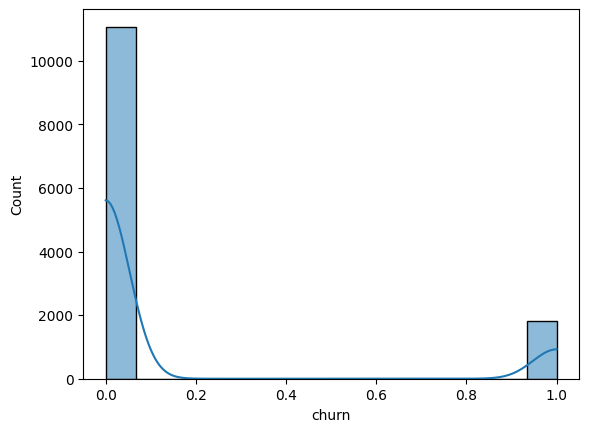

In [ ]:
print('histplot')
sns.histplot(data=cusdt, x='churn', stat='count', kde=True)

In [ ]:
#Hyper parameter tunning

param_grid = {'C': [0.6, 9, 34, 98],
              'gamma': [0.001, 0.09, 0.5, 1]}

svc = SVC(kernel='rbf')

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(a, b)

print("Best parameters: ", grid_search.best_params_)

print("Best accuracy: ", grid_search.best_score_*100)

Best parameters:  {'C': 9, 'gamma': 0.5}
Best accuracy:  78.33333333333334


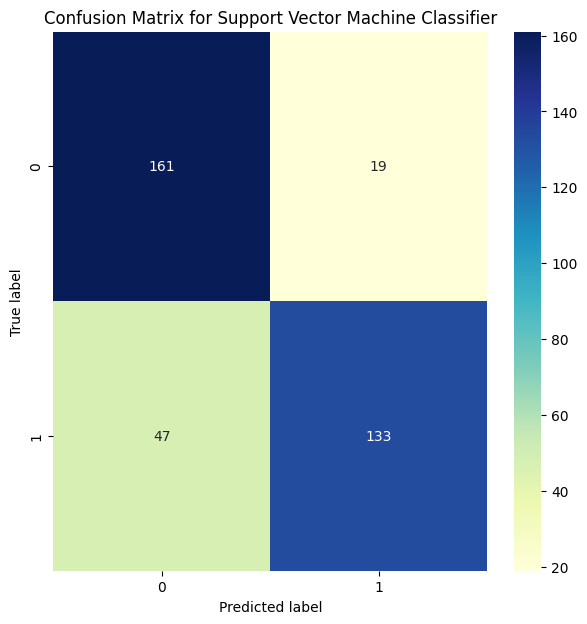

In [ ]:
prediction= svc_model.predict(a_test)
conmat = confusion_matrix(b_test, prediction)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conmat, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [ ]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(a_train, b_train)
prediction= dtc.predict(a_test)
accuracy_score=dtc.score(a_test, b_test)
res=confusion_matrix(b_test,prediction)
print("Confusion matrix")
print(res)
print('accuracy score obtained using DecisionTree algorithm is:',accuracy_score*100)
class_report=classification_report(b_test, prediction)
print('\n classification report:\n', class_report)

Confusion matrix
[[148  32]
 [ 29 151]]
accuracy score obtained using DecisionTree algorithm is: 83.05555555555556

 classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       180
           1       0.83      0.84      0.83       180

    accuracy                           0.83       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.83      0.83      0.83       360



In [ ]:
#Hyper parameter tunning

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(a, b)

print("Best parameters: ", grid_search.best_params_)

print("Best accuracy: ", grid_search.best_score_*100)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  81.16666666666667


In [ ]:
data = pd.DataFrame(a, columns= cusdt.churn)
data['accuracy_score_of_dtc'] = b

In [ ]:

data.loc[data.index.isin(b_test.index), 'accuracy_score'] = accuracy_score

In [ ]:
print('accuracy score obtained using DecisionTree algorithm is:', accuracy_score*100)
print('\n classification report:\n', classification_report(b_test, prediction))
print(data.head(5))

accuracy score obtained using DecisionTree algorithm is: 73.05555555555556

 classification report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       180
           1       0.73      0.72      0.73       180

    accuracy                           0.73       360
   macro avg       0.73      0.73      0.73       360
weighted avg       0.73      0.73      0.73       360

churn   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0  \
1005  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
2833  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
6241  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
11721 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
10145 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   

churn   0   0  accuracy_score_of_dtc  accuracy_score  
1005  NaN NaN                      0            

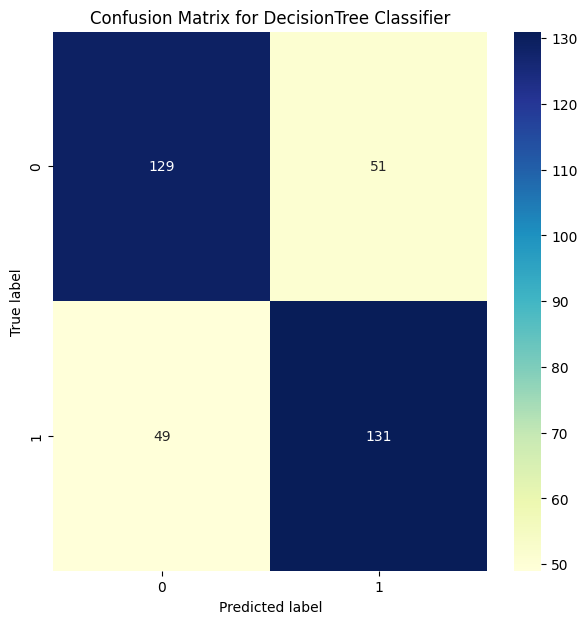

In [ ]:
dtc.fit(a_train, b_train)
prediction= dtc.predict(a_test)
conmat = confusion_matrix(b_test, prediction)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conmat, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix for DecisionTree Classifier')
plt.show()